# Extraktion und Analyse der Spannungsverlaufsdaten
Import der verwendeten Pakete

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

from joblib import dump
from sklearn.preprocessing import StandardScaler

from settings.Authentication import Authentication
from service.ThingsBoardClientLight import ThingsBoardClientLight
from service.DataService import DataService

## Einstellungen für das Speichern der Bilddateien

In [74]:
fontsize = 14
y_lim = 2.6, 4.1
save_plot = False

## Initialisieren der Settings- und Serviceklassen
**Hinweis:** In der Klasse "Authentication" müssen URL, Benutzername und Passwort hinterlegt werden, um eine erfolgreiche Verbindung zur ThingsBoard-REST-API herzustellen.

In [75]:
auth = Authentication()
tc = ThingsBoardClientLight(username=auth.USERNAME, api_url=auth.URL, password=auth.PASSWORD)
ds = DataService()

## Extraktion der Spannungsverlaufsdaten
Die Methode "fetch_timeseries_to_pickle" der Klasse "ThingsBoardClientLight" extrahiert die Spannungsdaten der Sensoren aus der IoT-Plattform ThingsBoard und speichert diese in einer .pickle-Datei.

**Hinweis:** Der Methode wird neben der "device_id" (SensorID) und der "key_list" (zu extrahierende Messwerte) auch der Parameter "end_time=1682251200*1000" übergeben. Dieser beschränkt die Extraktion der Daten bis zum angegebenen Zeitpunkt in Millisekunden. Wenn die historischen Daten bis zum aktuellen Zeitpunkt extrahiert werden sollen, kann der Parameter an dieser Stelle weggelassen werden. Um weitere Sensoren für die Analyse und Prädiktion zu berücksichtigen, müssten die Spannungsverlaufsdaten an dieser Stelle extrahiert werden.

In [76]:
# Fetch Data
tc.fetch_timeseries_to_pickle(device_id='3f394130-a5f9-11ed-8fa7-8d95df41b8ce', end_time=1682251200*1000, key_list=['data_BatV', 'data_rssi', 'data_snr'])
tc.fetch_timeseries_to_pickle(device_id='6aa082d0-a5f8-11ed-8fa7-8d95df41b8ce', end_time=1682251200*1000, key_list=['data_BatV', 'data_rssi', 'data_snr'])
tc.fetch_timeseries_to_pickle(device_id='fb1c9420-a5f8-11ed-8fa7-8d95df41b8ce', end_time=1682251200*1000, key_list=['data_BatV', 'data_rssi', 'data_snr'])

## Konvertieren der extrahierten Spannungsverlaufsdaten der Sensoren in Pandas DataFrames
Die Methode "pickle_to_pandas_dataframe" aus der DataService-Klasse lädt die extrahierten Spannungsverlaufsdaten aus der zuvor gespeicherten .pickle-Datei. Für jeden Schlüssel der Liste "key_list" erfolgt eine separate Konvertierung in ein Pandas DataFrame. Hierbei werden spezifische Datenbereinigungen, wie die Umwandlung von Werten in nummerische Formate sowie die Bereinigung von Einheiten und Zeitstempeln, durchgeführt. Nachdem weitere Datentransformationen wie Resampling, Berechnung gleitender Mittelwerte und Imputation durchgeführt wurden, werden die einzelnen DataFrames zu einem DataFrame konkateniert und zurückgegeben. Dieser Prozess ermöglicht eine geeignete Darstellung und Vorbereitung der Daten für die weiteren Analyse- und Vorverarbeitungsschritte.

**Hinweis:** Um weitere Sensoren in die Trainingsdaten aufzunehmen, müssten die Spannungsverlaufsdaten der Sensoren an dieser Stelle analog aufbereitet werden. Wenn die Spannungswerte bis zum aktuellen Zeitpunkt extrahiert wurden und weiter genutzt werden sollen, müssen an dieser Stelle die Dateinamen wie folgt geändert werden:

<b> "..._Thesis_extended_newm_RAW"  >>  "..._RAW" </b>


In [77]:
df_325723 = ds.pickle_to_pandas_dataframe('6aa082d0-a5f8-11ed-8fa7-8d95df41b8ce_Thesis_extended_newm_RAW',
                                          ['data_BatV', 'data_rssi', 'data_snr'],
                                          missing_values='lag_impute')
df_325733 = ds.pickle_to_pandas_dataframe('3f394130-a5f9-11ed-8fa7-8d95df41b8ce_Thesis_extended_newm_RAW',
                                          ['data_BatV', 'data_rssi', 'data_snr'],
                                          missing_values='lag_impute')
df_325744 = ds.pickle_to_pandas_dataframe('fb1c9420-a5f8-11ed-8fa7-8d95df41b8ce_Thesis_extended_newm_RAW',
                                          ['data_BatV', 'data_rssi', 'data_snr'],
                                          missing_values='lag_impute')

## Konvertieren der extrahierten Spannungsverlaufsdaten der Sensoren in Pandas DataFrames ohne Bereinigung und Aufbereitung
Die Verwendung des Parameters "raw=True" beim Aufruf der Methode "pickle_to_pandas_dataframe" der DataService-Klasse ermöglicht das direkte Laden der Rohdaten der Spannungsverläufe aus der .pickle-Datei in ein Pandas DataFrame. Dadurch werden die Daten in ihrer ursprünglichen Form für weitere Analysen und Verarbeitungsschritte verfügbar gemacht.

In [78]:
# timeseries to PandasDataframe RAW
df_325723_RAW = ds.pickle_to_pandas_dataframe('6aa082d0-a5f8-11ed-8fa7-8d95df41b8ce_Thesis_extended_RAW',
                                              ['data_BatV', 'data_rssi', 'data_snr'], raw=True)
df_325733_RAW = ds.pickle_to_pandas_dataframe('3f394130-a5f9-11ed-8fa7-8d95df41b8ce_Thesis_extended_RAW',
                                              ['data_BatV', 'data_rssi', 'data_snr'], raw=True)

# Analyse und Aufbereitung der Spannungsverlaufsdaten
Visualisierung der Rohdaten

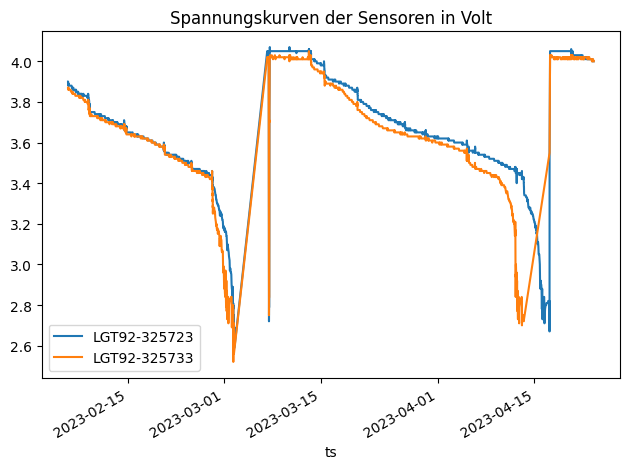

In [79]:
df_325723_RAW['data_BatV'].plot(label=f'LGT92-325723')
plt.title('Spannungskurven der Sensoren in Volt')
df_325733_RAW['data_BatV'].plot(label=f'LGT92-325733')
plt.legend()
plt.tight_layout()
plt.savefig(f'../../data/png/df_325733-23_raw_extended_plt_updated', pad_inches=2)
plt.show()

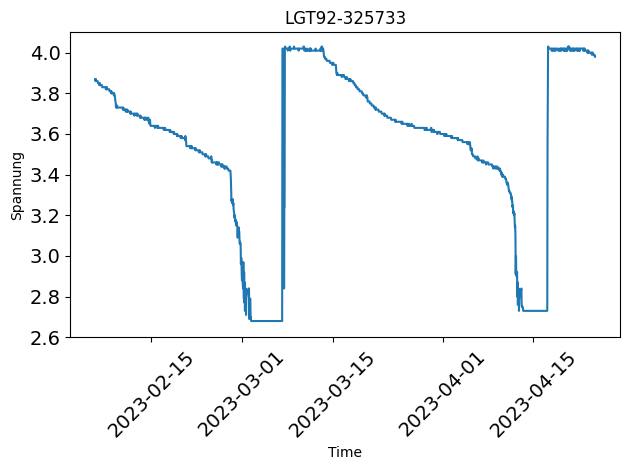

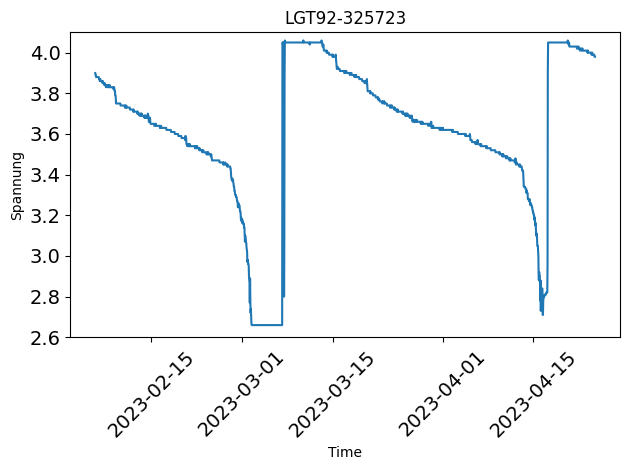

In [80]:
ds.draw_sensor_for_analysis(df_325733.index, df_325733['data_BatV'], 'LGT92-325733', 'LGT92-325733', scatter=False, save_plot=False)
ds.draw_sensor_for_analysis(df_325723.index, df_325723['data_BatV'], 'LGT92-325723', 'LGT92-325723', scatter=False, save_plot=False)

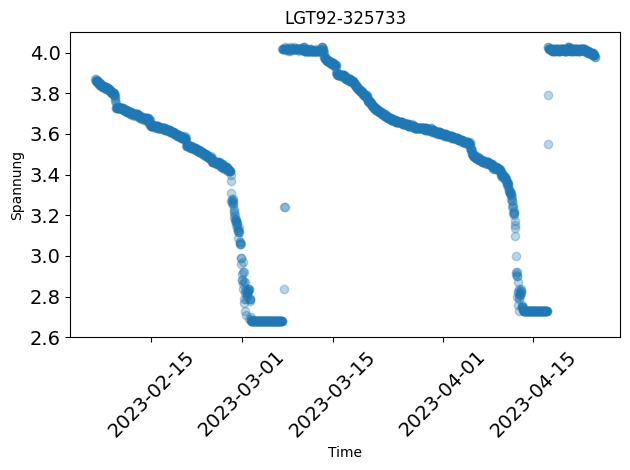

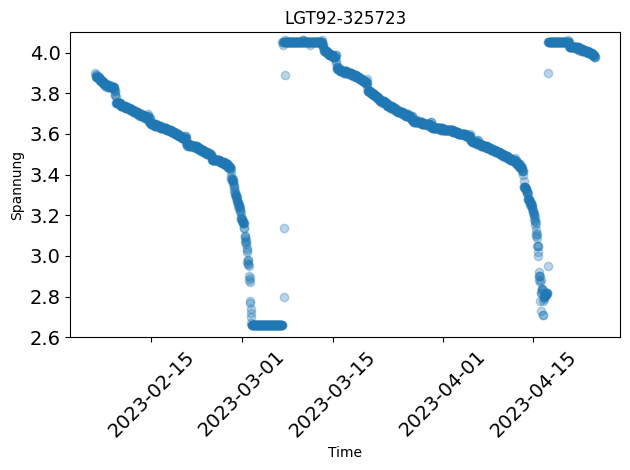

In [81]:
ds.draw_sensor_for_analysis(df_325733.index, df_325733['data_BatV'], 'LGT92-325733', 'LGT92-325733', scatter=True, save_plot=False)
ds.draw_sensor_for_analysis(df_325723.index, df_325723['data_BatV'], 'LGT92-325723', 'LGT92-325723', scatter=True, save_plot=False)

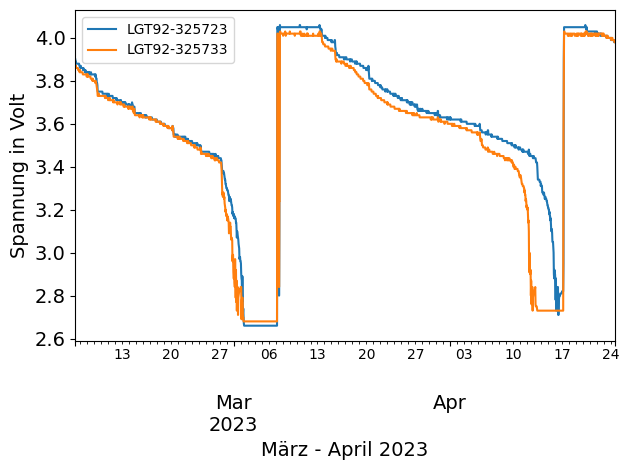

In [82]:
df_325723['data_BatV'].plot(label=f'LGT92-325723')
df_325733['data_BatV'].plot(label=f'LGT92-325733')
plt.xlabel('März - April 2023', fontsize=fontsize)
plt.ylabel('Spannung in Volt', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.legend()
plt.tight_layout()
plt.savefig(f'../../data/png/df_325733-23_raw_extended_plt', pad_inches=2)
plt.show()

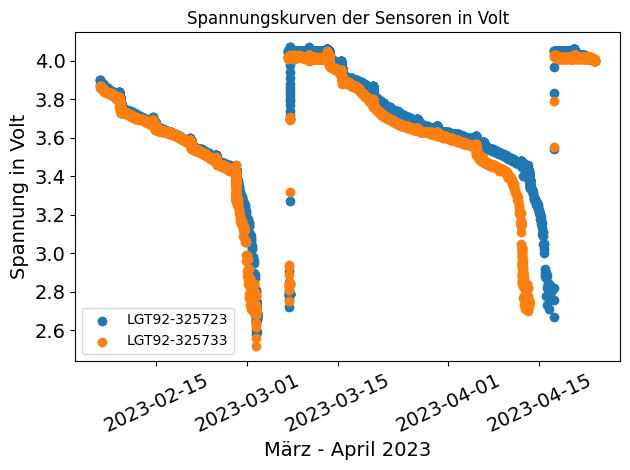

In [83]:
plt.scatter(df_325723_RAW.index, df_325723_RAW['data_BatV'], label=f'LGT92-325723')
plt.title('Spannungskurven der Sensoren in Volt')
plt.scatter(df_325733_RAW.index, df_325733_RAW['data_BatV'],label=f'LGT92-325733')
plt.xlabel('März - April 2023', fontsize=fontsize)
plt.ylabel('Spannung in Volt', fontsize=fontsize)
plt.xticks(fontsize=fontsize, rotation=25)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.legend()
plt.tight_layout()
plt.savefig(f'../../data/png/df_325733-23_raw_extended_plt_scatter', pad_inches=2)
plt.show()

## Ausschneiden der Ausreißer

<Axes: xlabel='ts'>

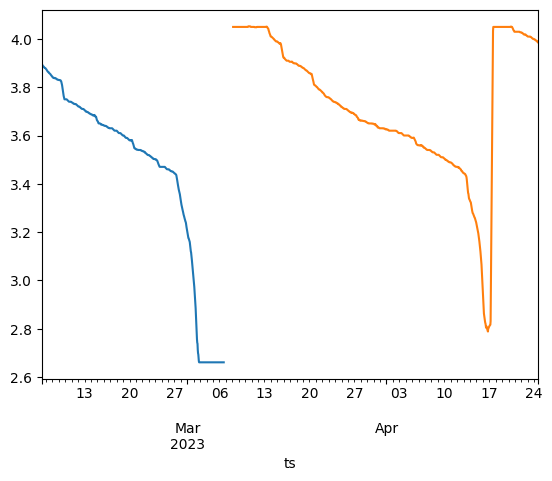

In [84]:
df_325723.iloc[:681]['rm_data_BatV'].plot()
df_325723.iloc[715:]['rm_data_BatV'].plot()

<Axes: xlabel='ts'>

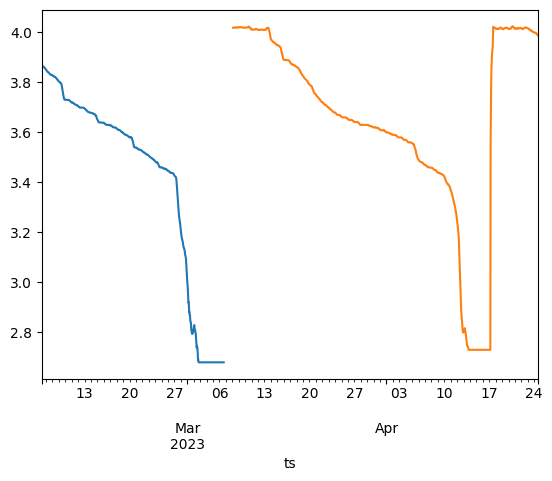

In [85]:
df_325733.iloc[:681]['rm_data_BatV'].plot()
df_325733.iloc[715:]['rm_data_BatV'].plot()

## Zusammenführen der um die Ausreißer bereinigten Spannungsverlaufsdaten

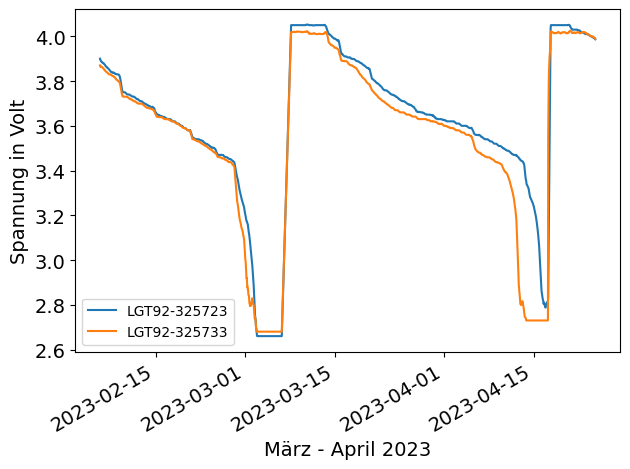

In [86]:
df_325723_cleaned_and_processed = pd.concat([df_325723.iloc[:681]['rm_data_BatV'], df_325723.iloc[715:]['rm_data_BatV']])
df_325723_cleaned_and_processed.plot(label=f'LGT92-325723')
df_325733_cleaned_and_processed = pd.concat([df_325733.iloc[:681]['rm_data_BatV'], df_325733.iloc[715:]['rm_data_BatV']])
df_325733_cleaned_and_processed.plot(label=f'LGT92-325733')
plt.xlabel('März - April 2023', fontsize=fontsize)
plt.ylabel('Spannung in Volt', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.legend()
plt.tight_layout()
plt.savefig(f'../../data/png/df_325733-23_rm_plt_extended', pad_inches=2)
plt.show()

## Prüfen der Spannungsverlaufsdaten der Sensoren LGT92-325723 & LGT92-325733 auf NaN-Werte

In [87]:
print(df_325733.isna().sum())
print(df_325723.isna().sum())

data_BatV                               0
data_rssi                               0
data_snr                                0
rm_data_BatV                            0
rm_data_rssi                            0
rm_data_snr                             0
sensor_id                               0
3f394130-a5f9-11ed-8fa7-8d95df41b8ce    0
dtype: int64
data_BatV                               0
data_rssi                               0
data_snr                                0
rm_data_BatV                            0
rm_data_rssi                            0
rm_data_snr                             0
sensor_id                               0
6aa082d0-a5f8-11ed-8fa7-8d95df41b8ce    0
dtype: int64


In [88]:
print(df_325723_RAW.isna().sum())
print(df_325733_RAW.isna().sum())

data_BatV    0
data_rssi    0
data_snr     0
dtype: int64
data_BatV    0
data_rssi    0
data_snr     0
dtype: int64


## Prüfung der Spannungsverlaufsdaten der Sensoren LGT92-325723 & LGT92-325733 auf Stationarität (Augmented Dickey-Fuller Test)

In [89]:
ds.ad_test(df_325723_cleaned_and_processed)

1. ADF : -2.7101161427353073
2. P-Value : 0.07230403402100287
3. Num Of Lags : 5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1814
5. Critical Values : 
	1% : -3.4339600207952796
	5% : -2.863134623063046
	10% : -2.5676189242070433


In [90]:
ds.ad_test(df_325733_cleaned_and_processed)

1. ADF : -2.2214424054178803
2. P-Value : 0.19855534170416567
3. Num Of Lags : 2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1817
5. Critical Values : 
	1% : -3.4339540519343137
	5% : -2.863131988080628
	10% : -2.5676175211639354


## Visuelle Prüfung der differenzierten Spannungsverlaufsdaten der Sensoren LGT92-325723 & LGT92-325733 auf Stationarität

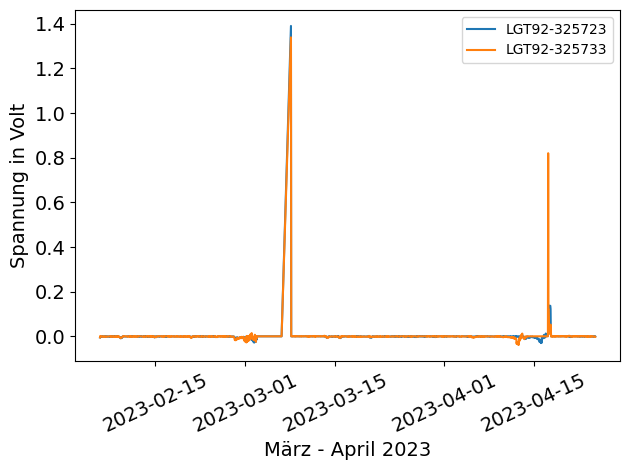

In [91]:
plt.plot(df_325723_cleaned_and_processed.diff().dropna(), label=f'LGT92-325723')
plt.plot(df_325733_cleaned_and_processed.diff().dropna(), label=f'LGT92-325733')
plt.xlabel('März - April 2023', fontsize=fontsize)
plt.ylabel('Spannung in Volt', fontsize=fontsize)
plt.xticks(fontsize=fontsize, rotation=25)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.legend()
plt.tight_layout()
plt.savefig(f'../../data/png/differenzierte_Datensaetze', pad_inches=2)

## Ausschneiden der einzelnen Spannungsverlaufskurven & Visualisierung der Ergebnisse
Die extrahierten Spannungsverlaufskurven werden manuell aus den vorverarbeiteten Spannungsverlaufsdaten ausgeschnitten und an die Methode "create_full_curve_thesis()" der DataService-Klasse übergeben. Diese Methode markiert den Beginn und das Ende der Kurven und füllt die Datenpunkte auf eine einheitliche Anzahl auf.

Hinweis: An dieser Stelle wäre eine Automatisierung sinnvoll, welche die einzelnen Spannungsverlaufskurven automatisiert aus den PandasDataFrames ausschneidet.

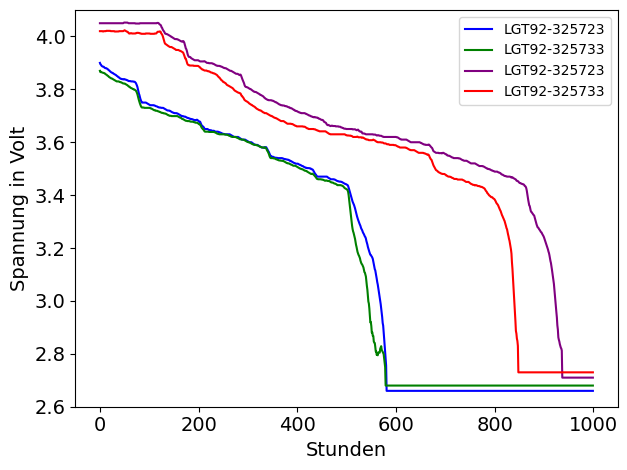

In [92]:
# create full_curves for given datasets
df_325723_full_curve = ds.create_full_curve_thesis(df_325723, 'data_BatV')
df_325723_full_curve_1 = df_325723.loc[df_325723['data_BatV'].idxmax():].copy()
df_325723_full_curve_1 = df_325723_full_curve_1[20:]
df_325723_full_curve_1 = ds.create_full_curve_thesis(df_325723_full_curve_1, 'data_BatV')

df_325733_full_curve = ds.create_full_curve_thesis(df_325733, 'data_BatV')
df_325733_full_curve_1 = df_325733.loc[df_325733['data_BatV'].idxmax():].copy()
df_325733_full_curve_1 = df_325733_full_curve_1[20:]
df_325733_full_curve_1 = ds.create_full_curve_thesis(df_325733_full_curve_1, 'data_BatV')

df_325744_full_curve = ds.create_full_curve_thesis(df_325744.iloc[:1000], 'data_BatV')
df_325744_full_curve_1 = df_325744.loc[df_325744['data_BatV'].idxmax():].copy()
df_325744_full_curve_1 = ds.create_full_curve_thesis(df_325744_full_curve_1, 'data_BatV')

df_325723_full_curve['rm_data_BatV'].plot(color='blue', label='LGT92-325723')
dump(df_325723_full_curve, '../../data/sensor_data/df_325723_full_curve')
df_325733_full_curve['rm_data_BatV'].plot(color='green', label='LGT92-325733')
dump(df_325733_full_curve, '../../data/sensor_data/df_325733_full_curve')
df_325723_full_curve_1['rm_data_BatV'].plot(color='purple', label='LGT92-325723')
dump(df_325723_full_curve_1, '../../data/sensor_data/df_325723_full_curve_1')
df_325733_full_curve_1['rm_data_BatV'].plot(color='red', label='LGT92-325733')
dump(df_325733_full_curve_1, '../../data/sensor_data/df_325733_full_curve_1')
df_325723_full_curve.tail()
plt.xlabel('Stunden', fontsize=fontsize)
plt.ylabel('Spannung in Volt', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.ylim(y_lim)
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(f'../../data/png/four_single_curves', pad_inches=2)

## Konkatenieren der einzelnen Spannungsverlaufskurven in ein Pandas DataFrame (Trainingsdatensatz)
Die einzelnen Spannungsverlaufskurven werden zu einem Pandas DataFrame zusammengeführt.

Hinweis: Weitere Spannungsverlaufskurven von Sensoren desselben Sensortyps können hier dem Trainingsdatensatz hinzugefügt werden.

In [93]:
df_train = pd.concat([df_325723_full_curve, df_325723_full_curve_1, df_325733_full_curve, df_325733_full_curve_1], ignore_index=True)
my_date_range = pd.date_range(end=df_325723.index[-1], periods=len(df_train), freq='H')
df_train['date'] = my_date_range
df_train.set_index('date', inplace=True)
df_train.fillna(0, inplace=True) # Auffüllen der nicht zugehörigen SensorIDs mit Nullen.
df_train.index.freq = 'H'
dump(df_train, '../../data/trainingsdata/df_train')

['../../data/trainingsdata/df_train']

### Visualisierung des konkatenierten Trainingsdatensatzes

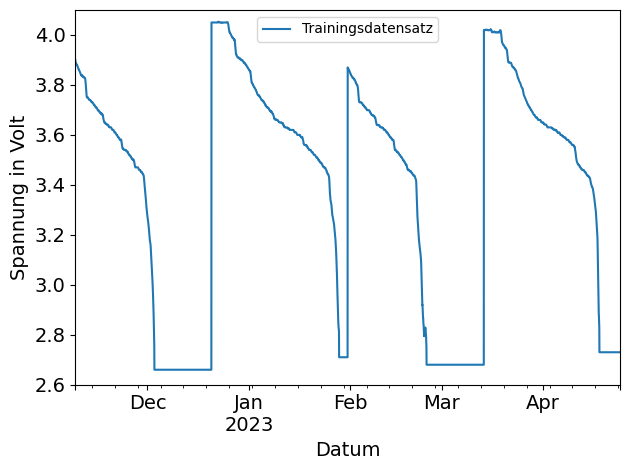

In [94]:
df_train['rm_data_BatV'].plot(label='Trainingsdatensatz')
plt.xlabel('Datum', fontsize=fontsize)
plt.ylabel('Spannung in Volt', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.ylim(y_lim)
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(f'../../data/png/Trainingsdatensatz', pad_inches=2)

### Umstrukturierung und Standardisierung des Trainingsdatensatzes für RNN-LSTM
In diesem Abschnitt werden die Trainingsdaten vorbereitet, indem diese in den X- und y-Datensätzen aufgeteilt und standardisiert werden. Anschließend werden die Daten für die Verwendung mit einem RNN-Modell umstrukturiert und im .pickle-Format gespeichert.

In [95]:
# prepare data
X_train_raw = df_train[
    ['rm_data_BatV', '6aa082d0-a5f8-11ed-8fa7-8d95df41b8ce', '3f394130-a5f9-11ed-8fa7-8d95df41b8ce', 'start',
     'end']].values
y_train_raw = df_train[['rm_data_BatV']].values

trainings_data_raw = (X_train_raw, y_train_raw)

dump(trainings_data_raw, '../../data/trainingsdata/LGT92-23-33_trainingsdata_for_RNN_RAW')

### Standardisierung von X
scaler_x = scaler = StandardScaler()
scaler_x.fit(X_train_raw)
X_train_std = scaler_x.transform(X_train_raw)
dump(scaler_x, '../../data/scaler/scaler_thesis_x.joblib')

### Standardisierung von y
scaler_y = StandardScaler()
scaler_y.fit(y_train_raw)
y_train_std = scaler_y.transform(y_train_raw)
dump(scaler_y, '../../data/scaler/scaler_thesis_y.joblib')

print(X_train_std.shape)

### set the window size, horizon of the prediction, as well as the number of features
window = 24
horizon = 1
indicators = 5

# restructure data for LSTM of customTB client
X_train, y_train = ds.restructure_data_for_lstm(X_train_std, y_train_std, window=window, horizon=horizon)

restructured_trainingsdata = (X_train, y_train)

dump(restructured_trainingsdata, '../../data/trainingsdata/LGT92-23-33_trainingsdata_for_RNN')

X_train.shape, y_train.shape

(4000, 5)


((3975, 24, 5), (3975, 1))

## Ausschneiden der einzelnen Spannungsverlaufskurven und Aufbereiten des Testdatensatzes des Sensor LGT92-325723
Vorgehen analog zum Trainingsdatensatz

In [96]:
df_325723_test = df_325723[-140:]
df_325723_test = ds.create_full_curve_thesis(df_325723_test, 'data_BatV', test=True)
dump(df_325723_test, '../../data/testdata/df_325723_test')

['../../data/testdata/df_325723_test']

### Visualisierung des Testdatensatzes des Sensor LGT92-325723

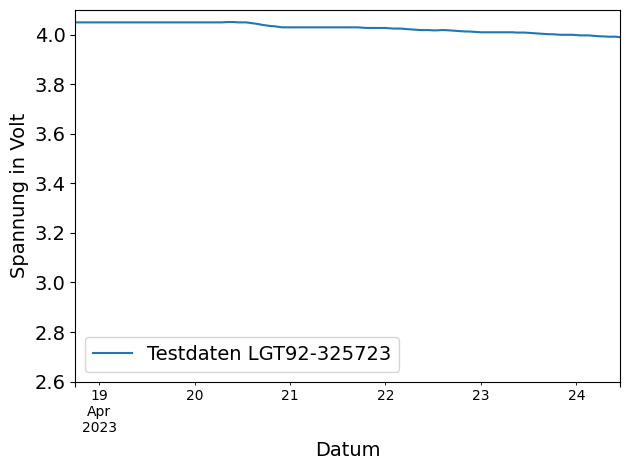

In [97]:
df_325723_test['rm_data_BatV'].plot(label='Testdaten LGT92-325723')
plt.xlabel('Datum', fontsize=fontsize)
plt.ylabel('Spannung in Volt', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.ylim(y_lim)
plt.tight_layout()
if save_plot:
    plt.savefig(f'../../data/png/test_data_LGT92-325723', pad_inches=2)

## Ausschneiden und Aufbereiten des Testdatensatzes des Sensor LGT92-325733
Vorgehen analog zum Trainingsdatensatz

In [98]:
df_325733_test = df_325733[-145:]
df_325733_test = ds.create_full_curve_thesis(df_325733_test, 'data_BatV', test=True)
dump(df_325733_test, '../../data/testdata/df_325733_test')

['../../data/testdata/df_325733_test']

### Visualisierung des Testdatensatzes des Sensor LGT92-325733

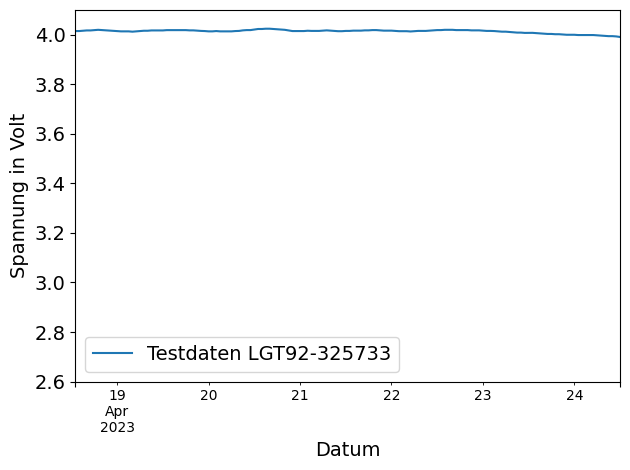

In [99]:
df_325733_test['rm_data_BatV'].plot(label='Testdaten LGT92-325733')
plt.legend()
plt.xlabel('Datum', fontsize=fontsize)
plt.ylabel('Spannung in Volt', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.ylim(y_lim)
plt.tight_layout()
if save_plot:
    plt.savefig(f'../../data/png/test_data_LGT92-325733', pad_inches=2)

## Hinzufügen der jeweils anderen SensorID zu den Testdatensätzen

In [104]:
df_325723_test[df_325733_full_curve['sensor_id'][0]] = 0
df_325733_test[df_325723_full_curve['sensor_id'][0]] = 0

## Umstrukturierung und Standardisierung des Testdatensatzes des Sensor LGT92-315723 für RNN-LSTM
In diesem Abschnitt werden die Testdaten des Sensor LGT92-315723 vorbereitet, indem diese in einen X- und einen y-Datensätzen aufgeteilt und standardisiert werden. Anschließend werden die Daten für die Verwendung mit einem RNN-Modell umstrukturiert. Der umstrukturierte Testdatensatz wird in einer .joblib-Datei gespeichert.

In [101]:
X_test_23_raw = df_325723_test[
    ['rm_data_BatV', '6aa082d0-a5f8-11ed-8fa7-8d95df41b8ce', '3f394130-a5f9-11ed-8fa7-8d95df41b8ce', 'start',
     'end']].values
y_test_23_raw = df_325723_test[['rm_data_BatV']].values

testdata_23_raw = (X_test_23_raw, y_test_23_raw)

dump(testdata_23_raw, '../../data/testdata/LGT92-23_testdata_for_RNN_RAW')

X_test_23_std = scaler_x.transform(X_test_23_raw)
y_test_23_std = scaler_y.transform(y_test_23_raw)

X_23_test, y_23_test = ds.restructure_data_for_lstm(X_test_23_std, y_test_23_std, window=window, horizon=horizon)

restructured_testdata_23 = (X_23_test, y_23_test)

dump(restructured_testdata_23, '../../data/testdata/LGT92-23_restructured_testdata_for_RNN')

['../../data/testdata/LGT92-23_restructured_testdata_for_RNN']

## Umstrukturierung und Standardisierung des Testdatensatzes des Sensor LGT92-315733 für RNN-LSTM
In diesem Abschnitt werden die Testdaten des Sensor LGT92-315733 vorbereitet, indem sie in den X- und y-Datensätzen aufgeteilt und standardisiert werden. Anschließend werden die Daten für die Verwendung mit einem RNN-Modell umstrukturiert. Der umstrukturierte Testdatensatz wird in einer .joblib-Datei gespeichert.

In [102]:
X_test_33_raw = df_325733_test[
    ['rm_data_BatV', '6aa082d0-a5f8-11ed-8fa7-8d95df41b8ce', '3f394130-a5f9-11ed-8fa7-8d95df41b8ce', 'start',
     'end']].values
y_test_33_raw = df_325733_test[['rm_data_BatV']].values

testdata_33_raw = (X_test_33_raw, y_test_33_raw)
dump(testdata_33_raw, '../../data/testdata/LGT92-33_testdata_for_RNN_RAW')

X_test_33_std = scaler_x.transform(X_test_33_raw)
y_test_33_std = scaler_y.transform(y_test_33_raw)

X_33_test, y_33_test = ds.restructure_data_for_lstm(X_test_33_std, y_test_33_std, window=window, horizon=horizon)

restructured_testdata_33 = (X_33_test, y_33_test)

dump(restructured_testdata_33, '../../data/testdata/LGT92-33_restructured_testdata_for_RNN')

['../../data/testdata/LGT92-33_restructured_testdata_for_RNN']

### Spannungsverlaufskurven des Sensor LGT92-325744


<Axes: >

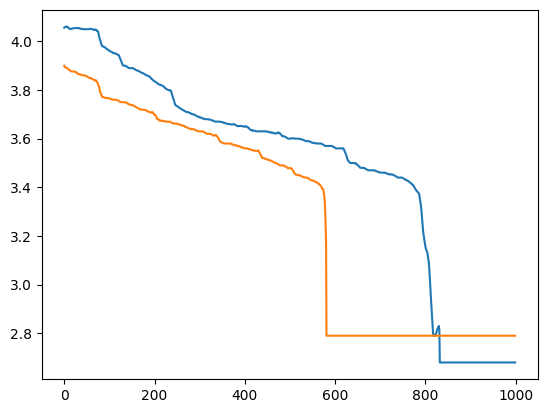

In [103]:
df_325744_full_curve_1['rm_data_BatV'].plot()
df_325744_full_curve['rm_data_BatV'].plot()